In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [ ]:
train_data = pd.read_csv('/content/sample_data/train_data.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_data.dtypes

label         int64
pixel1        int64
pixel2        int64
pixel3        int64
pixel4        int64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 785, dtype: object

In [ ]:
train_data.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64

In [ ]:
train_data.pixel783

0        203.0
1        135.0
2        194.0
3        229.0
4        164.0
         ...  
14512    182.0
14513    181.0
14514    185.0
14515    177.0
14516      NaN
Name: pixel783, Length: 14517, dtype: float64

In [ ]:
test_data = pd.read_csv('/content/sample_data/test_data.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
test_data.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [ ]:
test_data.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
traindata_label = train_data.label
traindata_label.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

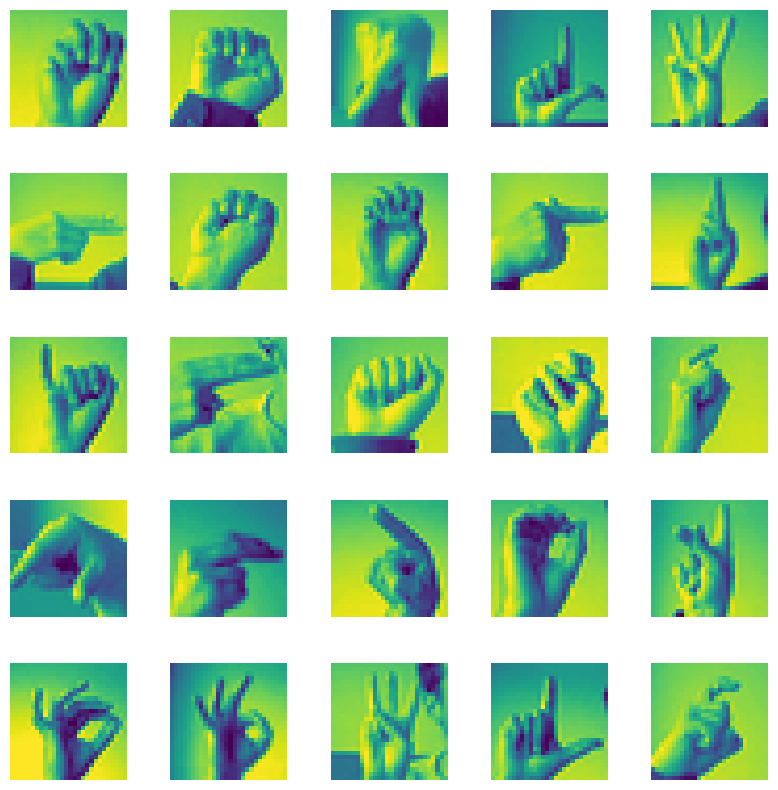

In [ ]:
a,b = plt.subplots(5,5, figsize = (10,10))
b = b.ravel()
n_train = len(train_data)
for i in np.arange(0, 25):
  index = np.random.randint(0, n_train)
  b[i].imshow(x_train[index].reshape(28,28))
  b[i].axis('off')
  plt.subplots_adjust(hspace=0.4)

<Axes: xlabel='label', ylabel='count'>

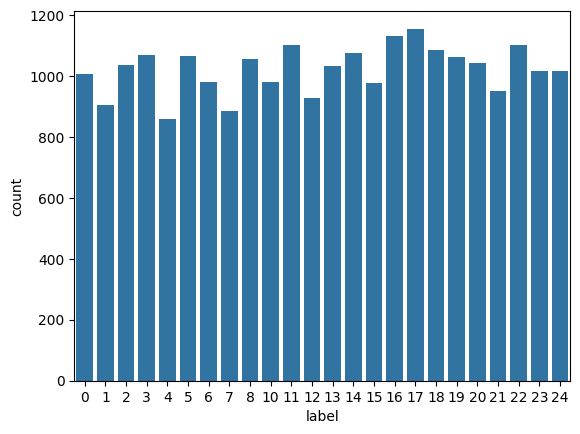

In [ ]:
sns.barplot(traindata_label.value_counts())

In [ ]:
train_ds = train_data.drop('label', axis = 1)
train_ds.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
x_train = train_ds.values.reshape(-1, 28, 28, 1)
x_train

array([[[[107.],
         [118.],
         [127.],
         ...,
         [170.],
         [170.],
         [169.]],

        [[111.],
         [121.],
         [129.],
         ...,
         [171.],
         [171.],
         [170.]],

        [[113.],
         [123.],
         [131.],
         ...,
         [171.],
         [171.],
         [171.]],

        ...,

        [[142.],
         [150.],
         [159.],
         ...,
         [202.],
         [201.],
         [200.]],

        [[142.],
         [151.],
         [160.],
         ...,
         [204.],
         [203.],
         [202.]],

        [[142.],
         [151.],
         [160.],
         ...,
         [204.],
         [203.],
         [202.]]],


       [[[155.],
         [157.],
         [156.],
         ...,
         [138.],
         [ 92.],
         [108.]],

        [[158.],
         [159.],
         [159.],
         ...,
         [142.],
         [116.],
         [143.]],

        [[161.],
         [161.],
      

In [ ]:
testdata_label = test_data.label
testdata_label.head()

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

In [ ]:
x_test = test_data.drop('label', axis = 1)
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
x_test = x_test.values.reshape(7172, 28, 28, 1)
x_test.shape

(7172, 28, 28, 1)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(traindata_label)
y_test = lb.fit_transform(testdata_label)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(f' x_train shape: {x_train.shape};\n y_train shape: {y_train.shape};\n x_test shape: {x_test.shape};\n y_test shape: {y_test.shape}.')

 x_train shape: (24543, 28, 28, 1);
 y_train shape: (24543, 24);
 x_test shape: (7172, 28, 28, 1);
 y_test shape: (7172, 24).


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 0,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

x_test = x_test/255

In [ ]:
x_test

array([[[[0.58431373],
         [0.58431373],
         [0.58823529],
         ...,
         [0.58823529],
         [0.58823529],
         [0.58431373]],

        [[0.58823529],
         [0.58823529],
         [0.58823529],
         ...,
         [0.59215686],
         [0.58823529],
         [0.59215686]],

        [[0.58823529],
         [0.59215686],
         [0.59215686],
         ...,
         [0.59215686],
         [0.59215686],
         [0.59607843]],

        ...,

        [[0.27058824],
         [0.27058824],
         [0.30196078],
         ...,
         [0.45490196],
         [0.44313725],
         [0.4627451 ]],

        [[0.29019608],
         [0.29411765],
         [0.29803922],
         ...,
         [0.43137255],
         [0.45490196],
         [0.44313725]],

        [[0.29411765],
         [0.29019608],
         [0.29019608],
         ...,
         [0.43921569],
         [0.47058824],
         [0.41960784]]],


       [[[0.49411765],
         [0.50196078],
         [0.51

In [ ]:
alp = {0: 'A',
       1: 'B',
       2: 'C',
       3: 'D',
       4: 'E',
       5: 'F',
       6: 'G',
       7: 'H',
       8: 'I',
       10: 'K',
       11: 'L',
       12: 'M',
       13: 'N',
       14: 'O',
       15: 'P',
       16: 'Q',
       17: 'R',
       18: 'S',
       19: 'T',
       20: 'U',
       21: 'V',
       22: 'W',
       23: 'X',
       24: 'Y'}

Text(0.5, 1.0, 'label: 19  letter: T')

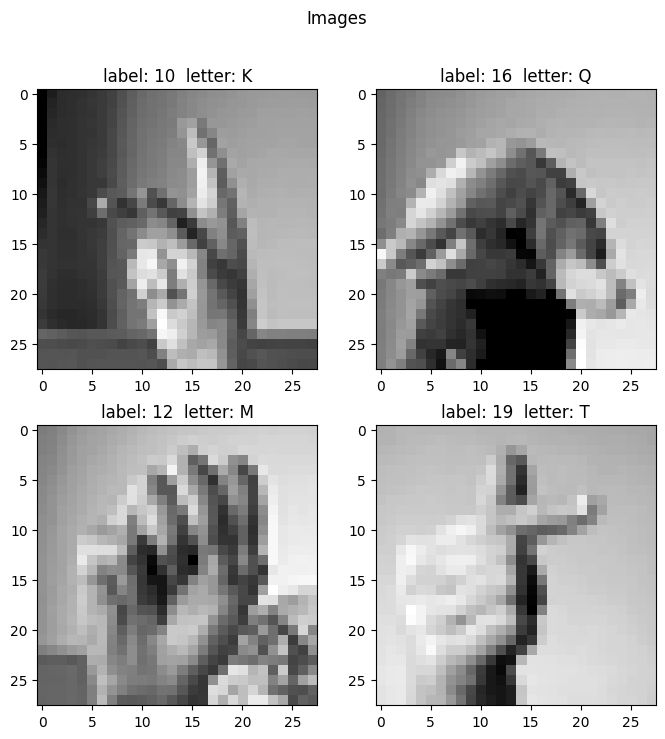

In [ ]:
fig,axe=plt.subplots(2,2, figsize = (8,8))
fig.suptitle('Images')

axe[0,0].imshow(x_train[11].reshape(28,28), cmap='gray')
axe[0,0].set_title(f'label: {traindata_label[11]}  letter: {alp[traindata_label[11]]}')

axe[0,1].imshow(x_train[22].reshape(28,28), cmap='gray')
axe[0,1].set_title(f'label: {traindata_label[22]}  letter: {alp[traindata_label[22]]}')

axe[1,0].imshow(x_train[31].reshape(28,28), cmap='gray')
axe[1,0].set_title(f'label: {traindata_label[31]}  letter: {alp[traindata_label[31]]}')

axe[1,1].imshow(x_train[19].reshape(28,28), cmap='gray')
axe[1,1].set_title(f'label: {traindata_label[19]}  letter: {alp[traindata_label[19]]}')

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size = (5,5),
                 strides = 1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (3,3), strides = 2, padding = 'same'))

model.add(Conv2D(64, kernel_size = (2,2),
                strides = 1, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, kernel_size = (2,2),
                strides = 1, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Flatten())

In [ ]:
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 24,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)         

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size = 250),
          epochs = 25,
          validation_data = (x_test, y_test),
          shuffle=1
         )

Epoch 1/25
110/110 [==============================] - 105s 950ms/step - loss: 2.2821 - accuracy: 0.2878 - val_loss: 1.5786 - val_accuracy: 0.4923
Epoch 2/25
110/110 [==============================] - 109s 989ms/step - loss: 1.7987 - accuracy: 0.4175 - val_loss: 1.2584 - val_accuracy: 0.5494
Epoch 3/25
110/110 [==============================] - 110s 1s/step - loss: 1.4614 - accuracy: 0.5197 - val_loss: 1.0606 - val_accuracy: 0.6153
Epoch 4/25
110/110 [==============================] - 103s 937ms/step - loss: 1.2195 - accuracy: 0.5921 - val_loss: 0.7758 - val_accuracy: 0.7432
Epoch 5/25
110/110 [==============================] - 104s 940ms/step - loss: 1.0347 - accuracy: 0.6520 - val_loss: 0.5646 - val_accuracy: 0.8182
Epoch 6/25
110/110 [==============================] - 105s 957ms/step - loss: 0.9024 - accuracy: 0.6944 - val_loss: 0.5374 - val_accuracy: 0.8161
Epoch 7/25
110/110 [==============================] - 103s 930ms/step - loss: 0.8011 - accuracy: 0.7309 - val_loss: 0.4252 - va

In [ ]:
#(ls,acc) = model.evaluate(x_test, y_test)

225/225 [==============================] - 10s 46ms/step - loss: 0.6251 - accuracy: 0.7776


In [ ]:
print(f'Acuracity: {round(model.evaluate(x_test, y_test)[1]*100)}%')

225/225 [==============================] - 4s 19ms/step - loss: 0.0417 - accuracy: 0.9908
Acuracity: 99%


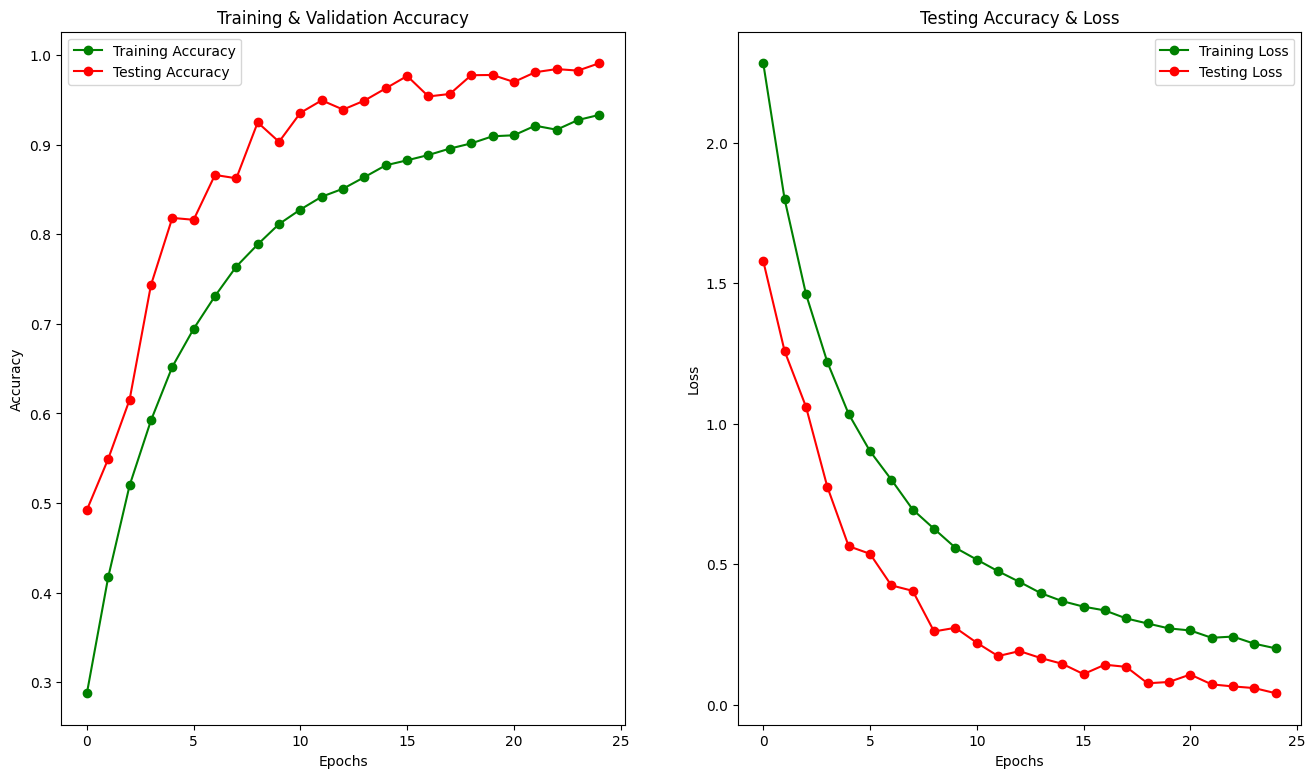

In [ ]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()